In [1]:
from pathlib import Path

import graphviz
import networkx as nx
import numpy as np

In [2]:
test_text = """1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581"""
input_text = Path("input.txt").read_text()
test_text2 = Path("test.txt").read_text()

In [3]:
def text2arr(text):
    return np.array([[int(i) for i in row] for row in text.split("\n")])

In [4]:
def make_graph(cave_arr):

    graph = nx.DiGraph()

    moves = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]], dtype=int)

    for start in np.indices(cave_arr.shape).reshape((2, -1)).T:

        for move in moves:
            end = start + move

            if np.all((end >= 0) * (end - cave_arr.shape < 0)):

                graph.add_edge(
                    tuple(start), tuple(end), label=cave_arr[end[0], end[1]]
                )
    return graph

In [5]:
def part1(text):

    cave_arr = text2arr(text)

    g = make_graph(cave_arr)
    cave_shape = cave_arr.shape

    return nx.shortest_path_length(
        g,
        source=(0, 0),
        target=(cave_shape[0] - 1, cave_shape[1] - 1),
        weight="label",
    )


assert part1(test_text) == 40

In [6]:
part1(input_text)

687

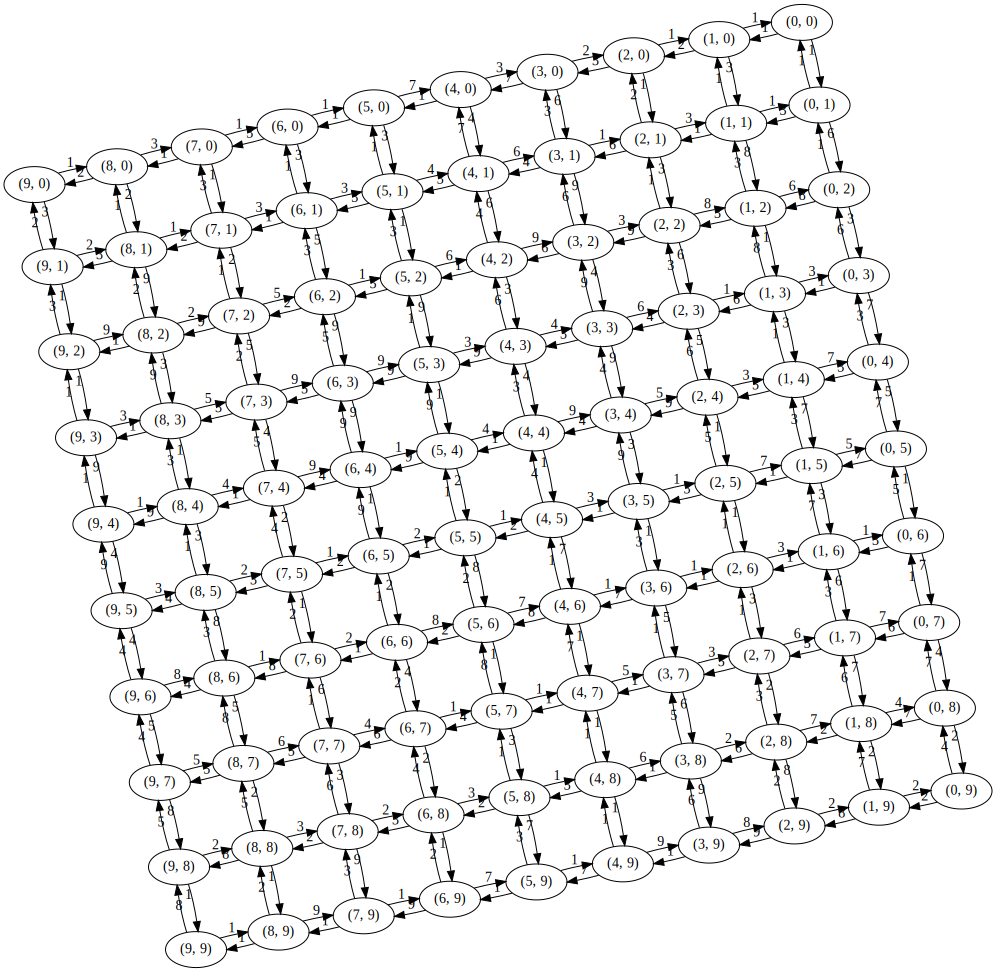

In [7]:
graph = make_graph(text2arr(test_text))
gv = graphviz.Source(nx.nx_pydot.to_pydot(graph).to_string())
gv.engine = "neato"
gv

# Part 2

In [8]:
def text2big_arr(text):

    cave_arr = text2arr(text)

    row_arr = np.concatenate([cave_arr + i for i in range(5)], axis=1)

    big_arr = np.concatenate([row_arr + i for i in range(5)], axis=0)

    return ((big_arr - 1) % 9) + 1


assert np.all(text2big_arr(test_text) == text2arr(test_text2))

In [9]:
def part2(text):
    cave_arr = text2big_arr(text)

    g = make_graph(cave_arr)
    cave_shape = cave_arr.shape

    return nx.shortest_path_length(
        g,
        source=(0, 0),
        target=(cave_shape[0] - 1, cave_shape[1] - 1),
        weight="label",
    )


assert part2(test_text) == 315

In [ ]:
part2(input_text)